<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview
This notebook contains the step by step approach undertaken to build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores; a large Ecuadorian-based grocery retailer.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# pip install pandas
# pip install numpy 
# pip install matplotlib
# pip install seaborn 
# pip install forex_python
# pip install babel 
# pip install seaborn
# pip install pandas-profiling 

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [75]:
# Data handling
import pandas as pd
import numpy as np
from statistics import mean
from forex_python.converter import CurrencyRates
from babel.numbers import format_currency
import datetime as dt

# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode
from scipy.stats import ttest_ind


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import plot
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
import sweetviz as sv

# balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine learning libraries and metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, Binarizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score,roc_curve, auc,roc_auc_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
import joblib
from sklearn.pipeline import Pipeline
import pickle
# Other packages
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import warnings
warnings.filterwarnings('ignore')
import patoolib


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
holidaysurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/holidays_events.csv"
oilurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/oil.csv"
storesurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/stores.csv"
testurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/test.csv"
trainurl="https://github.com/Gilbert-B/Regression-Project/releases/download/data/train.csv"
transactionsurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/transactions.csv"

In [4]:
test_df = pd.read_csv(testurl,error_bad_lines=False)
train_df= pd.read_csv(trainurl,error_bad_lines=False)
holidays_df= pd.read_csv(holidaysurl,error_bad_lines=False)
transaction_df= pd.read_csv(transactionsurl,error_bad_lines=False)
stores_df= pd.read_csv(storesurl,error_bad_lines=False)
oil_df= pd.read_csv(oilurl,error_bad_lines=False)

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

### Test Data Set

In [5]:
# A quick look at the shape of our test dataset

test_df.shape

(28512, 5)

In [6]:
#Looking at the head and tail of our dataset

test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [7]:
test_df.tail()

,id,date,store_nbr,family,onpromotion
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


In [8]:
#Look at the columns in the test dataset and their data types

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [9]:
#Get more details about the features of our data
test_df.describe()

,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,6.965383
std,8.230850e+03,15.586057,20.683952
min,3.000888e+06,1.000000,0.000000
25%,3.008016e+06,14.000000,0.000000
50%,3.015144e+06,27.500000,0.000000
75%,3.022271e+06,41.000000,6.000000
max,3.029399e+06,54.000000,646.000000


In [10]:
#Check for missing values
test_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

<AxesSubplot: >

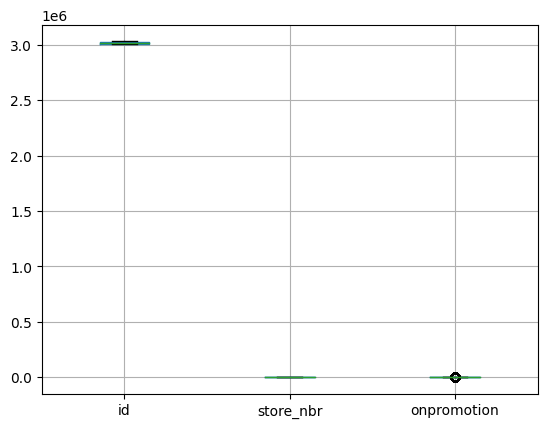

In [11]:
#Check for outliers
test_df.boxplot()

### Train Data Set

In [12]:
# A quick look at the shape of our train dataset

train_df.shape

(3000888, 6)

In [13]:
#Looking at the head and tail of our dataset

train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [14]:
train_df.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [15]:
#Look at the columns in the test dataset and their data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [16]:
#Get more details about the features of our data
train_df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [17]:
#Check for missing values
train_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

<AxesSubplot: >

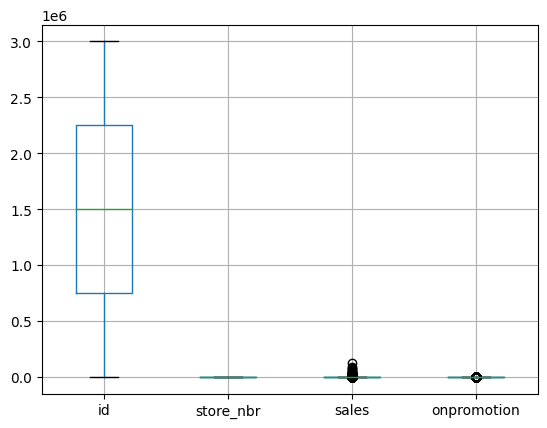

In [18]:
#Check for outliers
train_df.boxplot()

### Holidays Data Set

In [19]:
# A quick look at the shape of our holiday dataset

holidays_df.shape

(350, 6)

In [20]:
#Looking at the head and tail of our dataset

holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [21]:
holidays_df.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [22]:
#Look at the columns in the holidays dataset and their data types

holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [23]:
#Get more details about the features of our data
holidays_df.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


In [24]:
#Check for missing values
holidays_df.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

<AxesSubplot: >

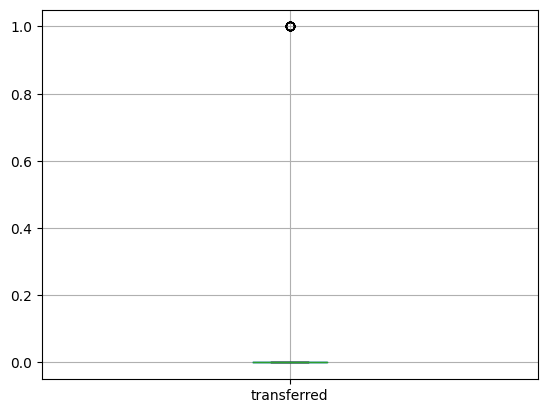

In [25]:
#Check for outliers
holidays_df.boxplot()

### Transactions Data Set

In [26]:
# A quick look at the shape of our transactions dataset

transaction_df.shape

(83488, 3)

In [27]:
#Looking at the head and tail of our dataset

transaction_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [28]:
transaction_df.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [29]:
#Look at the columns in the transactionss dataset and their data types

transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [30]:
#Get more details about the features of our data
transaction_df.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [31]:
#Check for missing values
transaction_df.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

<AxesSubplot: >

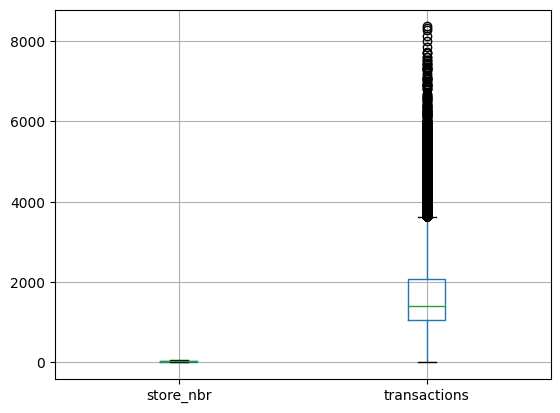

In [32]:
#Check for outliers
transaction_df.boxplot()

### Oil Data Set

In [33]:
# A quick look at the shape of our oil dataset

oil_df.shape

(1218, 2)

In [34]:
#Looking at the head and tail of our dataset
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [35]:
oil_df.tail()

,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [36]:
#Look at the columns in the oil dataset and their data types

oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [37]:
#Get more details about the features of our data
oil_df.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [38]:
#Check for missing values
oil_df.isna().sum()

date           0
dcoilwtico    43
dtype: int64

<AxesSubplot: >

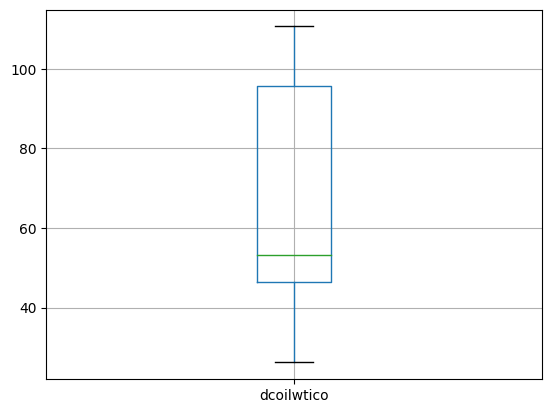

In [39]:
#Check for outliers
oil_df.boxplot()

### Stores Dataset

In [40]:
# A quick look at the shape of our stores dataset

stores_df.shape

(54, 5)

In [41]:
#Looking at the head and tail of our dataset
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [42]:
stores_df.tail()

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [43]:
#Look at the columns in the stores dataset and their data types

stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [44]:
#Get more details about the features of our data
stores_df.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [45]:
#Check for missing values
stores_df.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

<AxesSubplot: >

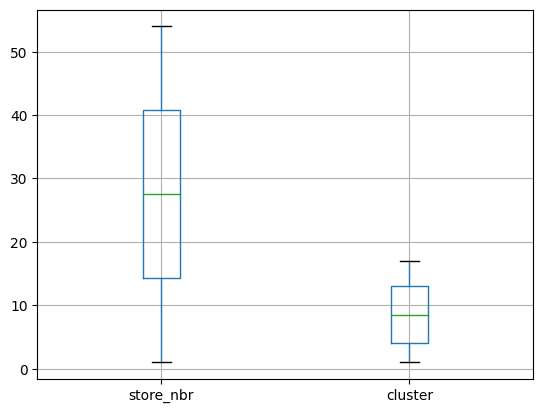

In [46]:
#Check for outliers
stores_df.boxplot()

## Questions 

Is the train dataset complete (has all the required dates)?

Which dates have the lowest and highest sales for each year?

Did the earthquake impact sales?

Are certain groups of stores selling more products? (Cluster, city, state, type)

Are sales affected by promotions, oil prices and holidays?

What analysis can we get from the date and its extractable features?

What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

Does the demographics of a store affect sales?

Does the fluctuation in oil prices affect sales of products? 

Do pay days affect sales?


# Hypothesis

Null Hypothesis :Change in oil prices has a corresponding effect on sales 

Alternate Hypothesis :Change in oil prices  does not have a corresponding effect on sales

# Issues with the data

1. Oil data has some missing values 
2. The whole data set need to be combined into one file 

# How to handle the issues

1. Deal with missing data by repplace all nullvalues with the mean value 
2. Combine the data sets to get a a single data set for analysis 

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

### Drop Duplicates

In [47]:
# Use pandas.DataFrame.drop_duplicates method
train_df.duplicated().any(), 
stores_df.duplicated().any(), 
oil_df.duplicated().any(),  
test_df.duplicated().any(),  
holidays_df.duplicated().any() 

False

There arent any duplicates

### Impute Missing Values 

From our data viewing we find out that some of the values missing in our oil datset 

In [48]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date           0
dcoilwtico    43
dtype: int64

In [49]:
#Filling missing values in oil data with the the value before that missing data
oil_df = oil_df.bfill()

In [50]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date          0
dcoilwtico    0
dtype: int64

Missing Values have been dealt

### New Features Creation

In [51]:
#create a new column known as day which is the same as the date column
#The new column would help in extracting date information instead of always re-indexing 

train_df['day'] = train_df['date']
test_df['day'] = test_df['date']

In [52]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013-01-01
1,1,2013-01-01,1,BABY CARE,0.0,0,2013-01-01
2,2,2013-01-01,1,BEAUTY,0.0,0,2013-01-01
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013-01-01
4,4,2013-01-01,1,BOOKS,0.0,0,2013-01-01


In [57]:
#Convert date column to datetime attribute for each dataset with date column 

train_df["date"] = pd.to_datetime(train_df["date"], format='%Y-%m-%d')
transaction_df["date"] = pd.to_datetime(transaction_df["date"], format='%Y-%m-%d')
oil_df["date"] = pd.to_datetime(oil_df["date"], format='%Y-%m-%d')
holidays_df["date"] = pd.to_datetime(holidays_df["date"], format='%Y-%m-%d')

test_df["date"] = pd.to_datetime(test_df["date"], format='%Y-%m-%d')

In [59]:
#Merge all the dataset
merged_df = pd.merge(train_df, stores_df, on='store_nbr', how='left')
merged_df = pd.merge(merged_df,transaction_df, on=['store_nbr','date'], how='left')
merged_df = pd.merge(merged_df,oil_df, on=['date'], how='left')
merged_df = pd.merge(merged_df,holidays_df, on=['date'], how='left')

In [60]:
#Check for missing values after the merge 
merged_df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
day                   0
city                  0
state                 0
type_x                0
cluster               0
transactions     249117
dcoilwtico       878526
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

For the numerical data we use the bfil method to impute the missing values.That is filling missing values with the available previous values 

In [61]:
 #Filling the missing data in the transaction and dcoilwtico using the Backfill method
merged_df["transactions"].fillna(method='bfill', inplace=True)

merged_df["dcoilwtico"].fillna(method='bfill', inplace=True)

For categorical attributes, we use the mode representation for the missing values.

In [62]:
# Find the mode of the 'type_y' column
mode = merged_df['type_y'].mode()[0]

# Replace missing values in the 'type_y' column with the mode
merged_df['type_y'].fillna(mode, inplace=True)

In [63]:
# Find the mode of the 'locale' column
mode = merged_df['locale'].mode()[0]

# Replace missing values in the 'locale' column with the mode
merged_df['locale'].fillna(mode, inplace=True)

In [64]:
# Find the mode of the 'description' column
mode = merged_df['description'].mode()[0]

# Replace missing values in the 'description' column with the mode
merged_df['description'].fillna(mode, inplace=True)

In [65]:
# Find the mode of the 'description' column
mode = merged_df['description'].mode()[0]

# Replace missing values in the 'description' column with the mode
merged_df['description'].fillna(mode, inplace=True)

In [66]:
# Find the mode of the 'locale_name' column
mode = merged_df['locale_name'].mode()[0]

# Replace missing values in the 'locale_name' column with the mode
merged_df['locale_name'].fillna(mode, inplace=True)

In [67]:
# Find the mode of the 'transferred' column
mode = merged_df['transferred'].mode()[0]

# Replace missing values in the 'locale_name' column with the mode
merged_df['transferred'].fillna(mode, inplace=True)

In [68]:
#Lets confirm if all mssing values have been cleared 
merged_df.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
day             0
city            0
state           0
type_x          0
cluster         0
transactions    0
dcoilwtico      0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

In [69]:
#Set date column as index

merged_df = merged_df.set_index('date')

In [70]:
#rename columns for consistency and easy identification. 

merged_df.rename(columns = {'type_x':'Store_type'}, inplace = True)
merged_df.rename(columns = {'type_y':'Holiday_type'}, inplace = True)

In [71]:
# A look at the columns in our mergesd data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   day           object 
 6   city          object 
 7   state         object 
 8   Store_type    object 
 9   cluster       int64  
 10  transactions  float64
 11  dcoilwtico    float64
 12  Holiday_type  object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   bool   
dtypes: bool(1), float64(3), int64(4), object(9)
memory usage: 399.1+ MB


In [73]:
#Generate some basic statistical information about our merged dataset. 
merged_df.describe()

,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,8.481481e+00,1.664934e+03,6.778930e+01
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,4.649735e+00,9.557386e+02,2.570258e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,2.619000e+01
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,1.032000e+03,4.628000e+01
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00,1.357000e+03,5.319000e+01
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,1.300000e+01,2.027250e+03,9.580000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,8.359000e+03,1.106200e+02


In [76]:
#The merged dataset is then analyzed further using sweetviz

# Generate the report
report = sv.analyze(merged_df)

# Visualize the report
report.show_html('report_merged_df.html', open_browser=True)

#The visualization will be displayed on a differet page of the browser. the visualization is highly interactive. 

                                             |                                             | [  0%]   00:00 ->…

Report report_merged_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#Create new attributes 'Year', 'Month' and 'Weekday Name'

merged_df['Year'] = merged_df.index.year
merged_df['Month'] = merged_df.index.month_name()
merged_df['Weekday_Name'] = merged_df.index.day_name()

In [ ]:
#Change data attribute to datetime for consistency 
merged_df["day"] = pd.to_datetime(merged_df["day"], format='%Y-%m-%d')

In [ ]:
# A look at the final df which will be used for analysis and modelling 
merged_df.head()

## Univariate Analysis 

In univariate analysis, statistical measures like mean, median, mode, standard deviation, and range are used to describe the data. It is often used to explore the data and gain an understanding of the underlying characteristics of a variable before performing more complex analyses.


In [77]:
##### Family

In [ ]:
# Get descriptive statistics for the family attribute
family_desc = merged_df["family"].describe()

family_desc

In [ ]:
merged_df["family"].value_counts(normalize=True) * 100

In [ ]:
# Get the frequency of each family 
family_freq = merged_df["family"].value_counts(normalize=True) * 100

# Create a bar chart
plt.bar(family_freq.index, family_freq.values)

# Set the title and axis labels
plt.title("Family Distribution in Dataset")
plt.xlabel("Family")
plt.ylabel("Frequency (%)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


## Optional: Train Dataset Balancing 

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

### Train the Model

### Evaluate the Model on the Evaluation dataset (Evalset)

### Predict on a unknown dataset (Testset)

## Simple Model #002

### Create the Model

### Train the Model

### Evaluate the Model on the Evaluation dataset (Evalset)

### Predict on a unknown dataset (Testset)

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.